<a href="https://colab.research.google.com/github/BD-David1108/AI_Projects/blob/main/Covid_19%26PneumoniaDLClassifModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from PIL import Image
import matplotlib.pyplot as plt

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Constructing an ImageDataGenerator Object
Directory = '/content/drive/MyDrive/data/Covid19-dataset/train'
Class = 'categorical'
Color_Mode = 'grayscale'
Target_Size = (256,256)
Batch_Size = 25

training_data_generator = ImageDataGenerator()
validation_data_generator = ImageDataGenerator()

training_iterator = training_data_generator.flow_from_directory(Directory, class_mode=Class, color_mode= Color_Mode, target_size=Target_Size, batch_size=Batch_Size)#, subset='training')

training_iterator.next()

print('\nLoading validation data...')

validation_iterator = validation_data_generator.flow_from_directory(Directory, class_mode=Class, color_mode= Color_Mode, target_size=Target_Size, batch_size=Batch_Size)#, subset='validation')

print(training_data_generator.__dict__)

Found 251 images belonging to 3 classes.

Loading validation data...
Found 251 images belonging to 3 classes.
{'featurewise_center': False, 'samplewise_center': False, 'featurewise_std_normalization': False, 'samplewise_std_normalization': False, 'zca_whitening': False, 'zca_epsilon': 1e-06, 'rotation_range': 0, 'width_shift_range': 0.0, 'height_shift_range': 0.0, 'shear_range': 0.0, 'zoom_range': [1.0, 1.0], 'channel_shift_range': 0.0, 'fill_mode': 'nearest', 'cval': 0.0, 'horizontal_flip': False, 'vertical_flip': False, 'rescale': None, 'preprocessing_function': None, 'dtype': 'float32', 'interpolation_order': 1, 'data_format': 'channels_last', 'channel_axis': 3, 'row_axis': 1, 'col_axis': 2, '_validation_split': 0.0, 'mean': None, 'std': None, 'zca_whitening_matrix': None, 'brightness_range': None}


In [5]:
#Designing the model
def design_model(training_data):
    #Sequential
    model = Sequential()
    #Adding the input layer with grayscale image shape
    model.add(tf.keras.Input(shape=(256,256,1)))
    #Adding convolutional hidden layers with relu functions
    #and maxpooling and dropout layers
    model.add(layers.Conv2D(5, 5, strides=3, activation='relu'))
    model.add(layers.MaxPooling2D(
            pool_size=(3,3),
            strides=(2,2)
    ))
    model.add(layers.Conv2D(2, 2, strides=1, activation='relu'))
    model.add(layers.MaxPooling2D(
            pool_size=(2,2),
            strides=(2,2)
    ))
    model.add(layers.Conv2D(1, 1, strides=1, activation='relu'))
    model.add(layers.MaxPooling2D(
            pool_size=(2,2),
            strides=(2,2)
    ))
    model.add(layers.Dropout(0.1))
    model.add(layers.Flatten())
    model.add(layers.Dense(3, activation='softmax'))

    #Compiling Model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.001), loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy(),tf.keras.metrics.AUC()],)
    print("\nCompiling model...")

    print(model.summary())
    return model


In [6]:
#Using model function
model = design_model(training_iterator)


Compiling model...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 84, 84, 5)         130       
                                                                 
 max_pooling2d (MaxPooling2  (None, 41, 41, 5)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 40, 40, 2)         42        
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 20, 20, 2)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 20, 20, 1)         3         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 

In [7]:
#Initializing EarlyStop
es = EarlyStopping(monitor='val_auc', mode='min', verbose=1, patience=30)
print("\nTraining model...")



Training model...


In [8]:
#Fitting the model
history =model.fit(
        training_iterator,
        steps_per_epoch=training_iterator.samples/Batch_Size, epochs=5,
        validation_data=validation_iterator,
        validation_steps=validation_iterator.samples/Batch_Size,
        callbacks=[es])

Epoch 1/5
10/10 [==============================] - 54s 5s/step - loss: 1.0984 - categorical_accuracy: 0.3386 - auc: 0.5000 - val_loss: 1.0981 - val_categorical_accuracy: 0.4422 - val_auc: 0.5408
Epoch 2/5
10/10 [==============================] - 18s 2s/step - loss: 1.0977 - categorical_accuracy: 0.4422 - auc: 0.5408 - val_loss: 1.0974 - val_categorical_accuracy: 0.4422 - val_auc: 0.5408
Epoch 3/5
10/10 [==============================] - 19s 2s/step - loss: 1.0969 - categorical_accuracy: 0.4422 - auc: 0.5669 - val_loss: 1.0962 - val_categorical_accuracy: 0.4422 - val_auc: 0.5817
Epoch 4/5
10/10 [==============================] - 18s 2s/step - loss: 1.0957 - categorical_accuracy: 0.4422 - auc: 0.5817 - val_loss: 1.0948 - val_categorical_accuracy: 0.4422 - val_auc: 0.5817
Epoch 5/5
10/10 [==============================] - 19s 2s/step - loss: 1.0943 - categorical_accuracy: 0.4422 - auc: 0.5878 - val_loss: 1.0935 - val_categorical_accuracy: 0.4422 - val_auc: 0.5817


In [9]:
#Calculating classification report and confusion matrix
test_steps_per_epoch = numpy.math.ceil(validation_iterator.samples / validation_iterator.batch_size)
predictions = model.predict(validation_iterator, steps=test_steps_per_epoch)
test_steps_per_epoch = numpy.math.ceil(validation_iterator.samples / validation_iterator.batch_size)
predicted_classes = numpy.argmax(predictions, axis=1)
true_classes = validation_iterator.classes
class_labels = list(validation_iterator.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

11/11 [==============================] - 9s 780ms/step
                 precision    recall  f1-score   support

          Covid       0.44      1.00      0.61       111
         Normal       0.00      0.00      0.00        70
Viral Pneumonia       0.00      0.00      0.00        70

       accuracy                           0.44       251
      macro avg       0.15      0.33      0.20       251
   weighted avg       0.20      0.44      0.27       251



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


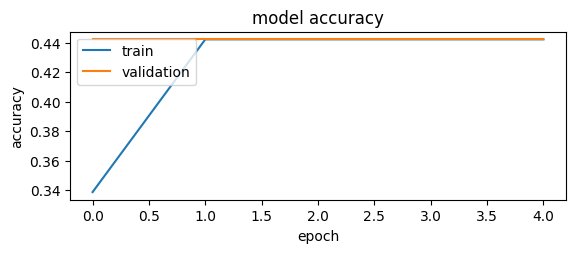

In [10]:
# plotting categorical and validation accuracy over epochs
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['categorical_accuracy'])
ax1.plot(history.history['val_categorical_accuracy'])
ax1.set_title('model accuracy')
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.legend(['train', 'validation'], loc='upper left')


In [11]:
# plotting auc and validation auc over epochs
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['auc'])
ax2.plot(history.history['val_auc'])
ax2.set_title('model auc')
ax2.set_xlabel('epoch')
ax2.set_ylabel('auc')
ax2.legend(['train', 'validation'], loc='upper left')

cm=confusion_matrix(true_classes,predicted_classes)
print(cm)

[[111   0   0]
 [ 70   0   0]
 [ 70   0   0]]
